# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import random

In [4]:
data = pd.read_csv('/content/drive/Othercomputers/내 컴퓨터/Colab/tobigs/Week2/Optimization/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [9]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [10]:
# parameter 개수
N = len(X_train.loc[0])

In [11]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.99974856, 0.28298977, 0.89007039])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X \cdot \theta $

In [12]:
def dot_product(X, parameters):
    z = np.dot(X,parameters)
    return z

## Logistic Function

## $p = \frac{1}{1+exp(-z)}$

In [13]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1 + np.exp(-z))
    return p

In [14]:
logistic(X_train.iloc[1], parameters)

0.7980883180650064

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum y_ilog(p) + (1-y_i)log(1 - p)$

In [15]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -np.sum(y * np.log(p) + (1-y) * np.log(1-p))
    return loss

In [16]:
def mse_i(X, y, parameters):
    z = dot_product(X,parameters)
    loss = (1/2) * np.sum(np.power(y - z,2))
    return loss

In [17]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n: 현재 배치의 데이터 수
    loss = 0
    loss = loss_function(X_set,y_set,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [18]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

1.5305590563890223

In [19]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.48071571770029

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\sum(y_i - \theta^tX_i)X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\sum (y_i - p_i)X_{ij}$

In [20]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        z = dot_product(X,parameters)
        gradient = (y - z) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    gradient = - gradient
    return gradient

In [21]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.1812657189200635

In [22]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09228986169053069

In [23]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [24]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]

    for X,y in zip(X_set.values,y_set.values):
        for j in range(len(gradients)):
            gradients[j] += get_gradient_ij(X,y,parameters,j,model)

    return gradients

In [25]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[107.96228405349888, 123.47595950498118, 179.07131904305785]

In [26]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[61.03252793766303, 6.368136379390819, 42.09955934991235]

## mini-batch
인덱스로 미니 배치 나누기

In [27]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:

1. 전체 data를 batch_size로 나눠서 전체 mini batch의 갯수를 구한다.
2. 첫번째 batch는 0 ~ 1*batch_size, 두번째 batch는 1*batch_size ~ 2*batch_size ... 가 된다. 이 구조로 인덱싱을 한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [28]:
def step(parameters, gradients, learning_rate, n): #n: 현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] = gradients[i] * learning_rate / n

    parameters = parameters - gradients

    return parameters

In [29]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.99567973, 0.28256522, 0.88726375])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 한번 학습에 사용할 데이터 양
- epoch: 현재 모든 데이터에 대한 학습 횟수
- num_epoch: 모든 데이터에 대한 학습 횟수
<br>

BGD: 모든 데이터에 대해서 한번에 학습 진행
SGD: 하나의 데이터에 대해서 학습 진행
MGD: 일부 데이터에 대해서 학습 진행
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> Stochastic Gradient Descent
batch_size=k -> Mini-Batch Gradient Descent
batch_size=whole -> Batch Gradient Descent

In [30]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]

            gradients = batch_gradient(X_batch, y_batch, parameters, model)

            parameters = step(parameters, gradients, learning_rate, len(X_batch))

            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [31]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9316997689742402  params: [0.4923518  0.49204806 0.56861699]  gradients: [0.032218768134980175, 0.0069914811871066036, 0.02849180051682265]
epoch: 100  loss: 0.4582111488842431  params: [-0.81404847  0.84047902 -0.75117275]  gradients: [0.0038937033155732738, -0.006235186776012053, 0.006770048112207479]
epoch: 200  loss: 0.39425301919010103  params: [-1.03052486  1.37736964 -1.29367411]  gradients: [0.001315340895680746, -0.004552968981389088, 0.004466947286997217]
epoch: 300  loss: 0.3628063076797781  params: [-1.13615721  1.77039951 -1.67707619]  gradients: [0.0008913729502349943, -0.0034108484853908575, 0.003312012243929746]
epoch: 400  loss: 0.3444461513592743  params: [-1.21606173  2.07233043 -1.96929204]  gradients: [0.0007236505740969392, -0.0026852369467274613, 0.0025903605786605777]
epoch: 500  loss: 0.3326885578895201  params: [-1.28248411  2.31444636 -2.20221887]  gradients: [0.0006113721853947252, -0.0021908481150672604, 0.002102044591169048]
epoch: 600  l

array([-1.50068313,  3.0657768 , -2.91698762])

In [32]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.29366337128198444  params: [-0.83269773  0.90677202 -1.04558976]  gradients: [0.026353117444599797, 0.014341391719267061, 0.018541809451313847]
epoch: 100  loss: 0.07736679533585984  params: [-1.93032483  4.17501702 -4.06768887]  gradients: [0.007538551059125701, 0.0041024866967597235, 0.005304054731708863]
epoch: 200  loss: 0.07736266552835525  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522450941, 0.004102273622126827, 0.005303779250129431]
epoch: 300  loss: 0.07736266518361799  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767206, 0.004102273604340306, 0.005303779227133458]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss:

array([-1.9303681 ,  4.17514311, -4.06780375])

In [33]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 1.1622364192286836  params: [0.15612522 0.21493099 0.5867719 ]  gradients: [0.05485166737334387, 0.050530230927754834, 0.06643945397631168]
epoch: 100  loss: 0.19970557256896762  params: [-1.55310222  3.04394711 -2.99281466]  gradients: [0.007432252948444532, 0.010931060684124255, 0.014587760556547232]
epoch: 200  loss: 0.16846349431757776  params: [-1.77045587  3.73638539 -3.64672046]  gradients: [0.006976421469992003, 0.010566450534701864, 0.013087588315262966]
epoch: 300  loss: 0.15738774629963867  params: [-1.86676733  4.03773614 -3.92877819]  gradients: [0.0068568378116932475, 0.010446353448539199, 0.012561564538723263]
epoch: 400  loss: 0.15231891691061306  params: [-1.91538203  4.18897642 -4.06978518]  gradients: [0.00681007784884189, 0.010393190534554156, 0.012322013809259546]
epoch: 500  loss: 0.14974828737374543  params: [-1.94128722  4.26936203 -4.14458578]  gradients: [0.006788300266376596, 0.010366651945547796, 0.012200812940430987]
epoch: 600  loss: 0.1483

array([-1.97155144,  4.36310798, -4.23169273])

### Predict Label

In [34]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [35]:
from sklearn.metrics import *

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [37]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [38]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [39]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [40]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.64614507, 2.54477637])

In [41]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.8884752579526557  params: [1.335094   0.71380849]  gradients: [-0.08505283804338787, -0.06617285482830226]
epoch: 100  loss: 0.5980000880592715  params: [0.64070529 2.54706548]  gradients: [-0.008518756270184896, -0.006266269410507072]
epoch: 200  loss: 0.5979683338556309  params: [0.63925639 2.54964035]  gradients: [-0.008467209912230772, -0.0062230922301388]
epoch: 300  loss: 0.5979682858394971  params: [0.63925419 2.54964427]  gradients: [-0.008467131564437902, -0.006223026603062163]
epoch: 400  loss: 0.5979682857665157  params: [0.63925418 2.54964427]  gradients: [-0.008467131445353375, -0.00622302650331245]
epoch: 500  loss: 0.5979682857664047  params: [0.63925418 2.54964427]  gradients: [-0.008467131445172365, -0.0062230265031608285]
epoch: 600  loss: 0.5979682857664047  params: [0.63925418 2.54964427]  gradients: [-0.008467131445172128, -0.006223026503160631]
epoch: 700  loss: 0.5979682857664047  params: [0.63925418 2.54964427]  gradients: [-0.00846713144517212

array([0.63925418, 2.54964427])

In [42]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

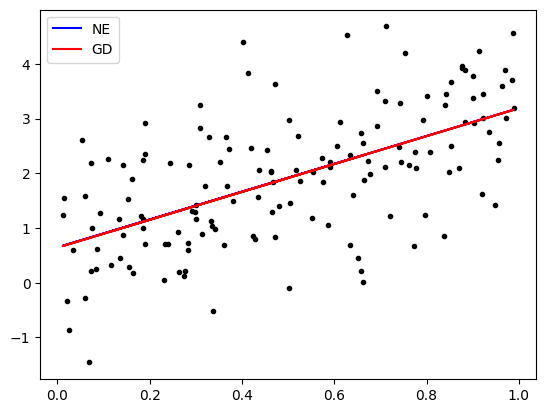

In [43]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()
